# Gathering Data :
* Download The WeRateDogs Twitter archive manually and Gathering archive_df .


In [4]:
import pandas as pd
import numpy as np
import requests 
import os

archive_df = pd.read_csv('twitter-archive-enhanced.csv')


* Dowload tweet image predictions programmatically using the Requests library from the following 
<a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv" target="_blank">Link</a> and preparing Image_predictions_df.


In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

file_name = "image-predictions.tsv"

if not os.path.exists(file_name):
    with open(os.path.join(url.split("/")[-1]),mode="wb") as file:
        file.write(response.content)
    
Image_predictions_df = pd.read_csv('image-predictions.tsv',sep="\t")

* Using the Twitter API to get  each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file .

In [6]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# archive_df is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


* Reading tweet_json.txt and prepare api_df

In [7]:
import json 
f = open('tweet-json.txt') 
# json.loads(f.read())
data = [json.loads(line) for line in open('tweet-json.txt', 'r')]
# print(json.dumps(data[0], indent=2))

In [8]:
column_names =["id","retweet_count","favorite_count","followers_count","created_at"]
dictionary={
            column_names[0]:[i["id"] for i in data],
            column_names[1]:[i["retweet_count"] for i in data],
            column_names[2]:[i["favorite_count"] for i in data],
            column_names[3]:[i["user"]["followers_count"] for i in data],
            column_names[4]:[i["created_at"] for i in data]
           }
api_df = pd.DataFrame(dictionary,columns = column_names)


# Assessing
### Archive Data :

In [9]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
#checking data types of each column
#checkin null values 
#checking column names 
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
#checking stats of data
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# printing names with count of each name 
for name,count in zip(archive_df.name.value_counts().sort_values(ascending=False).index.tolist(),archive_df.name.value_counts(ascending=False).sort_values(ascending=False)):
    print("count is :{}\tname is :{}".format(count,name))


count is :745	name is :None
count is :55	name is :a
count is :12	name is :Charlie
count is :11	name is :Cooper
count is :11	name is :Lucy
count is :11	name is :Oliver
count is :10	name is :Tucker
count is :10	name is :Penny
count is :10	name is :Lola
count is :9	name is :Winston
count is :9	name is :Bo
count is :8	name is :the
count is :8	name is :Sadie
count is :7	name is :Toby
count is :7	name is :an
count is :7	name is :Bailey
count is :7	name is :Buddy
count is :7	name is :Daisy
count is :6	name is :Stanley
count is :6	name is :Milo
count is :6	name is :Jax
count is :6	name is :Rusty
count is :6	name is :Bella
count is :6	name is :Dave
count is :6	name is :Koda
count is :6	name is :Leo
count is :6	name is :Scout
count is :6	name is :Jack
count is :6	name is :Oscar
count is :5	name is :George
count is :5	name is :Bentley
count is :5	name is :Sunny
count is :5	name is :Alfie
count is :5	name is :Sammy
count is :5	name is :Gus
count is :5	name is :Louis
count is :5	name is :Oakley
cou

In [13]:
archive_df.rating_denominator.value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
archive_df.doggo.value_counts()


None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
archive_df[archive_df.rating_denominator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [17]:
#cheking text column to determine the right regex to extract names 
for i in archive_df.text.values:
    print(i,"\n")

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU 

This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV 

This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB 

This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ 

This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f 

Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh 

Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfAs1


This is Moreton. He's the Good Boy Who Lived. 13/10 magical as h*ck https://t.co/rLHGx3VAF3 

Meet Dave. It's his favorite day of the year. He gets to fulfill his dream of being a dinosaur. 12/10 inspirational af https://t.co/MgQSdfZGPN 

Oh h*ck look at this spookling right here. Fright level off the charts. 12/10 sufficiently spooked https://t.co/BNy9IIJMb0 

This is Tucker. He's out here bustin h*ckin ghosts. 13/10 dedicated af https://t.co/Ap477GhwXt 

This is Juno. She spooked me up real good, but only to get my attention. Above average handwriting for a dog I think. 11/10 https://t.co/hFxxBCWlwj 

This is Maude. She's the h*ckin happiest wasp you've ever seen. 10/10 would pet with caution https://t.co/etL8FHBrh8 

Say hello to Lily. She's pupset that her costume doesn't fit as well as last year. 12/10 poor puppo https://t.co/YSi6K1firY 

This is Newt. He's a strawberry. 11/10 https://t.co/2VhmlwxA1Q 

This is Benji. He's Air Bud. It's a low effort costume but he pulls it off rat

This is Enchilada (yes, that's her real name). She's a Low-Cruisin Plopflopple. Very rare. Only a few left. 12/10 https://t.co/SiaiTWgsfP 

This is Raymond. He controls fountains with his tongue. 11/10 pretty damn magical https://t.co/9aMxSbOaAZ 

This is all I want in my life. 12/10 for super sleepy pupper https://t.co/4RlLA5ObMh 

This is Rueben. He has reached ultimate pupper zen state. 11/10 tranquil af https://t.co/Z167HgtnBi 

This is Cilantro. She's a Fellation Gadzooks. Eyes are super magical af. 12/10 could get lost in https://t.co/yJ26LNuyj5 

Here's a doggo struggling to cope with the winds. 13/10 https://t.co/qv3aUwaouT 

This pupper had to undergo emergency haircut surgery so he could hear again. 10/10 miraculous af https://t.co/fUyDIFkBwx 

This pupper was about to explain where that dirt came from but then decided against it. 11/10 https://t.co/SbaelU6zRs 

I swear to god if we get sent another Blue Madagascan Peacock we'll deactivate. We 👏 Only 👏 Rate 👏 Dogs... 9/10 htt

Gang of fearless hoofed puppers here. Straight savages. Elevated for extra terror. Front one has killed before 6/10s https://t.co/jkCb25OWfh 

This is Tino. He really likes corndogs. 9/10 https://t.co/cUxGtnBfc2 

"Yo Boomer I'm taking a selfie, grab your stick"
"Ok make sure to get this rad hole I just dug in there"

Both 10/10 https://t.co/e0gbl9VFpA 

This is Kulet. She's very proud of the flower she picked. Loves it dearly. 10/10 now I want a flower https://t.co/myUUwqJIs7 

This is Sweets the English Bulldog. Waves back to other bikers. 12/10 just a fantastic friendly pupper https://t.co/WYiFzuX7D4 

Heartwarming scene of two pups that want nothing more than to be together. Touching af. Great tongue. Both 11/10 https://t.co/k32mSlRx0j 

Say hello to Lupe. This is how she sleeps. 10/10 impressive really https://t.co/Fz6iZWlk8C 

Meet Sadie. She fell asleep on the beach and her friends buried her. 10/10 can't trust fellow puppers these days https://t.co/LoKVvc1xAW 

Say hello to Tig

This is Tommy. He's a cool dog. Hard not to step on. Won't let go of seashell. Not fast by any means. 3/10 https://t.co/0gY6XTOpn3 

This is Ben &amp; Carson. It's impossible for them to tilt their heads in the same direction. Cheeky wink by Ben. 11/10s https://t.co/465sIBdvzU 

😂😂😂 10/10 for the dog and the owner https://t.co/5iYF0Ci0EK 

Awesome dog here. Not sure where it is tho. Spectacular camouflage. Enjoys leaves. Not very soft. 5/10 still petable https://t.co/rOTOteKx4q 

This is Raphael. He is a Baskerville Conquistador. Entertains at all the gatherings. 10/10 simply magnificent https://t.co/3NTykJmtHt 

This is Zoey. Her dreams of becoming a hippo ballerina don't look promising. 9/10 it'll be ok puppers https://t.co/kR1fqy4NKK 

Here we see really big dog cuddling smaller dog. Very touching. True friendship. 10/10s would pet both at once https://t.co/A6XnvxHiUQ 

This is Julio. He was one of the original Ringling Bros. Exceptional balance. Very alert. Ready for anything. 10/1

### Image Predictions :

In [18]:
Image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
Image_predictions_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
Image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### API data :

In [21]:
api_df

,id,retweet_count,favorite_count,followers_count,created_at
0,892420643555336193,8853,39467,3200889,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,3200889,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,3200889,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,3200889,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,3200889,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...,...
2349,666049248165822465,41,111,3201018,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,147,311,3201018,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,47,128,3201018,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,48,132,3201018,Sun Nov 15 23:05:30 +0000 2015


In [22]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2354 non-null   int64 
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
 4   created_at       2354 non-null   object
dtypes: int64(4), object(1)
memory usage: 92.1+ KB


In [23]:
api_df.describe()

,id,retweet_count,favorite_count,followers_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


# `Quality Issues` :

* ### archive_df :
    * There are many  Dogs names  written as  "a" . (Done)
    * Many Dog Names are Missing with None rather than null values . (Done)
    * doggo ,flufer ,pupper and  puppo has "None" rather than null values. (Done)
    * tweets id is integer while it shoould be string  data type .(Done)
    * data contain replies and retweets data which is not needed  in archive and image predictions data frames . (Done)
    * Expanded url missing some links and  which is tweets without a picture not needed . (Done)
    * There is tweets with out photos in archive data . (Done)
    * strange values of rating_denominator and  rating_numerator varying from 0 to 1776 . (Done)
    * timestamp coulmn is an object data type although it should be datetime data type. (Done)
    
    
* ### Image_predictions_df:
    * tweets id is integer while it shoould be string or object data type .(Done)
    * p1, p2, p3,p1_conf,p2_conf,p3_conf are not  desciptive column names .(Done)
    

# `Tidiness Issues` :

* ### archive_df :

    * doggo ,flufer ,pupper and  puppo is not coulmns but values for dog_stage .(Done)
    
    * Unused Columns  in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp .(Done)

* ###  Image_predictions_df:
    * p1, p2, p3 are not coulmns but values for breed predictions can be combined(Done)
    * p1_conf,p2_conf,p3_conf are not coulmns but values for breed predictions accuracy can be combined .
    (Done)

* ###  api_df :
    * api data frame is not a full observation unit it is a part of archive_df so must be compined with archive data 
    .(Done)

# `Cleaning`:


In [24]:
archive_df_cleaned = archive_df.copy()
Image_predictions_df_cleaned = Image_predictions_df.copy()
api_df_cleaned = api_df.copy()

`Quality Issue`:
* bad representation of null values by writing "None" in name column  .<BR>
    
`Define`: 
   * Replace All "None" Values With np.nan value

`Code`: 

In [25]:
archive_df_cleaned.name = archive_df_cleaned.name.replace("None",np.nan)

`Test`: 

In [26]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       2356 

`Quality Issue`:
* Expanded url missing 59 links  which is tweets without a picture not needed<BR>
    
`Define`: 
   * drop rows of tweets without image 

`Code`: 

In [27]:
archive_df_cleaned =archive_df_cleaned[archive_df_cleaned.expanded_urls.notnull()]

`Test`: 

In [28]:
len(archive_df_cleaned.expanded_urls)

2297

`Quality Issue`:
* timestamp coulmn is an object data type although it should be datetime data type. <BR>
    
`Define`: 
   * Change  timestamp coulmn to datetime in a archive data frame .

`Code`: 

In [29]:
archive_df_cleaned['timestamp']= pd.to_datetime(archive_df_cleaned['timestamp']) 

`Test`: 

In [30]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2297 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2297 non-null   datetime64[ns, UTC]
 4   source                      2297 non-null   object             
 5   text                        2297 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2297 non-null   int64           

`Quality Issue`:
* tweets id is integer while it should be string  data type . <BR>
    
`Define`: 
   * Change  tweets id coulmn type from int to object in a archive data frame and image prediction data frame and api data frame  .

`Code`: 

In [31]:
archive_df_cleaned.tweet_id = archive_df_cleaned.tweet_id.astype(str)
Image_predictions_df_cleaned.tweet_id = Image_predictions_df_cleaned.tweet_id.astype(str)
api_df_cleaned.id = api_df_cleaned.id.astype(str)

`Test`: 

In [32]:
archive_df_cleaned.info()
Image_predictions_df_cleaned.info()
api_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2297 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2297 non-null   datetime64[ns, UTC]
 4   source                      2297 non-null   object             
 5   text                        2297 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2297 non-null   int64           

`Quality Issue`:
* There is tweets with out photos in archive data . <BR>
    
`Define`: 
   * remove any tweet which id is not in tweet id column in image predictions data frame .

`Code`: 

In [33]:
#get ids list of tweets with images 
tweets_ids_contain_images = list(Image_predictions_df_cleaned.tweet_id.unique())
# Removing any tweet which id is not in list of tweets with images 
archive_df_cleaned = archive_df_cleaned[archive_df_cleaned.tweet_id.isin(tweets_ids_contain_images)]

`Test`: 

In [34]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2075 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2075 non-null   datetime64[ns, UTC]
 4   source                      2075 non-null   object             
 5   text                        2075 non-null   object             
 6   retweeted_status_id         81 non-null     float64            
 7   retweeted_status_user_id    81 non-null     float64            
 8   retweeted_status_timestamp  81 non-null     object             
 9   expanded_urls               2075 non-null   object             
 10  rating_numerator            2075 non-null   int64           

`Quality Issue`:
* data contain replies and retweets data which is not needed in data in archive and image predictions data frames . <BR>
    
`Define`: 
   * Change  tweets id coulmn type from int to object in a archive data frame and image prediction data frame and api data frame  .

`Code`: 

In [35]:
# Get Retweets Ids 
retweets_ids = list(archive_df_cleaned[archive_df_cleaned.retweeted_status_id.notnull()].tweet_id)
retweets_ids +=list(archive_df_cleaned[archive_df_cleaned.in_reply_to_status_id.notnull()].tweet_id)
# Drop Retweetsfrom archive_df_cleaned
archive_df_cleaned = archive_df_cleaned[~archive_df_cleaned.tweet_id.isin(retweets_ids)]
# create tweets ids list 
tweets_ids = list(archive_df_cleaned.tweet_id)
# Drop Retweets from Image_predictions_df_cleaned
Image_predictions_df_cleaned = Image_predictions_df_cleaned[Image_predictions_df_cleaned.tweet_id.isin(tweets_ids)]

# Drop Retweets from Image_predictions_df_cleaned
api_df_cleaned = api_df_cleaned[api_df_cleaned.id.isin(tweets_ids)]



`Test`: 

In [36]:
archive_df_cleaned.info()
Image_predictions_df_cleaned.info()
api_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1971 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1971 non-null   datetime64[ns, UTC]
 4   source                      1971 non-null   object             
 5   text                        1971 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1971 non-null   object             
 10  rating_numerator            1971 non-null   int64           

`Tidiness Issue`:
* Unused Columns  in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp <BR>
    
`Define`: 
   * drop  Unused Columns 

`Code`: 

In [37]:

archive_df_cleaned.drop(["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id" ,"retweeted_status_timestamp"], axis=1, inplace=True)

`Test`: 

In [38]:
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1447 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

`Quality Issue`:
   * There are many  Dogs names  written as  "a" . <BR>
    
`Define`: 
   * Writing and combiling regex pattern to extract the correct name .

`Code`: 

In [39]:
# preparing regex that will get missing names and trying it with various text samples gathered visually from csv file 
import re 
# text="This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"
# text="This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI"
# text="Say hello to Aiden. His eyes are magical. Loves his little Guy Fieri friend. Sneaky tongue slip. 11/10 would caress https://t.co/Ac37LOe3xD"
# text="Meet Al cabone . He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV"
# text = "This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW"
# text = "This is Amber. She's a Fetty Woof. 10/10 would pet in a heartbeat https://t.co/Dt360V2MYI"
text = "This is a Sizzlin Menorah spaniel from Brooklyn named Wylie."
regex = r"This is \w\w\w+|His name is \w+|Meet \w+|Say hello to \w+|named \w+"
re.findall(regex,text)[0].split()[-1]

'Wylie'

In [40]:
#printing nummber of a values before finding names with regex 
print("length of a names before applying regex to find missing names  is :",len(archive_df_cleaned[archive_df_cleaned.name=="a"]))

# the regex pattern wich we tested 
regex = r"This is \w\w\w+|His name is \w+|Meet \w+|Say hello to \w+|named \w+"

#looping over data frame raws which contain name value "a" and try to extract the right name from column text 
for text ,index in zip(archive_df_cleaned[archive_df_cleaned.name=="a"].text,archive_df_cleaned[archive_df_cleaned.name=="a"].index) :
    try:
        name = re.findall(regex,text)[0].split()[-1]
        #assignig the found name to the row of data frame 
        archive_df_cleaned.at[index, 'name'] = name
    except IndexError as e:
        pass
    
print("length of a names after applying regex to find missing names :",len(archive_df_cleaned[archive_df_cleaned.name=="a"]))

length of a names before applying regex to find missing names  is : 55
length of a names after applying regex to find missing names : 35


`Test`: 

In [41]:
#cheking for names and its count 
for name,count in zip(archive_df_cleaned.name.value_counts().sort_values(ascending=False).index.tolist(),archive_df_cleaned.name.value_counts(ascending=False).sort_values(ascending=False)):
    print("count is :{}\tname is :{}".format(count,name))


count is :35	name is :a
count is :11	name is :Charlie
count is :10	name is :Oliver
count is :10	name is :Cooper
count is :10	name is :Lucy
count is :9	name is :Tucker
count is :9	name is :Penny
count is :8	name is :Sadie
count is :8	name is :Winston
count is :7	name is :Daisy
count is :7	name is :Lola
count is :7	name is :Toby
count is :7	name is :the
count is :6	name is :an
count is :6	name is :Jax
count is :6	name is :Bella
count is :6	name is :Koda
count is :6	name is :Bo
count is :6	name is :Stanley
count is :5	name is :Milo
count is :5	name is :Scout
count is :5	name is :Dave
count is :5	name is :Buddy
count is :5	name is :Chester
count is :5	name is :Leo
count is :5	name is :Bailey
count is :5	name is :Rusty
count is :5	name is :Louis
count is :5	name is :Oscar
count is :4	name is :Brody
count is :4	name is :Gus
count is :4	name is :Phil
count is :4	name is :Gary
count is :4	name is :one
count is :4	name is :George
count is :4	name is :Alfie
count is :4	name is :Maggie
count is :

`Quality Issue`:
* api data frame is not a full observation unit it is a part of archive_df so must be compined with archive data <BR>
    
`Define`: 
   
   * change api data frame coulmn name id to tweet_id
   * merge archive data frame and api data frame by tweet_id coulmn 

`Code`: 

In [42]:
api_df_cleaned = api_df_cleaned.rename(columns={'id': 'tweet_id'})
tweets_data_df = pd.merge(archive_df_cleaned, api_df_cleaned, on='tweet_id')

`Test`: 

In [43]:
tweets_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1447 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
 12  retweet_count       1971 non-null 

`Tidiness Issue`:
* doggo ,flufer ,pupper and  puppo is not coulmns but values for dog_stage  <BR>
    
`Define`: 
   * concat all columns to new column dog_stage .
   * separate by a hyphen for readability it there is two or more dog stages concatenated.
   * drop doggo ,flufer ,pupper and  puppo columns .

`Code`: 

In [44]:
# Change "None" value to "" .
tweets_data_df.doggo = tweets_data_df.doggo.replace("None","")
tweets_data_df.floofer = tweets_data_df.floofer.replace("None","")
tweets_data_df.pupper = tweets_data_df.pupper.replace("None","")
tweets_data_df.puppo = tweets_data_df.puppo.replace("None","")
# concat all columns to new column dog_stage 
tweets_data_df["dog_stage"]= tweets_data_df["doggo"] +tweets_data_df["floofer"]+tweets_data_df["pupper"]+tweets_data_df["puppo"]

#displaying dog_stage to find concatenated stages 
for i in tweets_data_df[tweets_data_df.dog_stage!=""].dog_stage:
    print(i)



doggo
puppo
puppo
pupper
doggo
floofer
pupper
pupper
puppo
pupper
pupper
puppo
pupper
doggo
pupper
doggo
doggo
puppo
pupper
puppo
doggo
doggopuppo
pupper
doggofloofer
pupper
doggo
doggo
pupper
pupper
pupper
doggo
pupper
doggo
pupper
doggo
doggo
doggo
doggo
doggo
pupper
doggo
doggo
doggo
pupper
doggo
doggo
doggo
doggo
puppo
puppo
pupper
puppo
pupper
doggo
doggo
doggo
puppo
doggo
doggo
doggo
doggopupper
pupper
pupper
doggo
doggo
doggo
doggo
pupper
pupper
doggopupper
pupper
puppo
pupper
puppo
doggopupper
pupper
floofer
doggo
doggo
pupper
doggo
doggo
pupper
puppo
puppo
puppo
doggo
doggopupper
doggo
doggo
puppo
pupper
pupper
pupper
pupper
floofer
pupper
doggo
doggo
pupper
pupper
pupper
doggo
doggo
pupper
doggo
doggopupper
doggo
doggo
pupper
doggo
puppo
pupper
doggo
doggo
doggo
puppo
doggo
doggopupper
pupper
puppo
pupper
pupper
pupper
pupper
doggo
pupper
floofer
doggo
doggo
pupper
doggo
puppo
doggo
puppo
pupper
pupper
pupper
pupper
doggopupper
pupper
pupper
doggo
puppo
floofer
pupper
pupper


In [45]:
# add hyphen to any concatenated 
tweets_data_df.dog_stage=tweets_data_df.dog_stage.replace("doggopupper","doggo-pupper")
tweets_data_df.dog_stage=tweets_data_df.dog_stage.replace("doggofloofer","doggo-floofer")
tweets_data_df.dog_stage=tweets_data_df.dog_stage.replace("doggopuppo","doggo-puppo")

In [46]:
#displaying dog_stage  after adding hyphen 
for i in tweets_data_df[tweets_data_df.dog_stage!=""].dog_stage:
    print(i)

doggo
puppo
puppo
pupper
doggo
floofer
pupper
pupper
puppo
pupper
pupper
puppo
pupper
doggo
pupper
doggo
doggo
puppo
pupper
puppo
doggo
doggo-puppo
pupper
doggo-floofer
pupper
doggo
doggo
pupper
pupper
pupper
doggo
pupper
doggo
pupper
doggo
doggo
doggo
doggo
doggo
pupper
doggo
doggo
doggo
pupper
doggo
doggo
doggo
doggo
puppo
puppo
pupper
puppo
pupper
doggo
doggo
doggo
puppo
doggo
doggo
doggo
doggo-pupper
pupper
pupper
doggo
doggo
doggo
doggo
pupper
pupper
doggo-pupper
pupper
puppo
pupper
puppo
doggo-pupper
pupper
floofer
doggo
doggo
pupper
doggo
doggo
pupper
puppo
puppo
puppo
doggo
doggo-pupper
doggo
doggo
puppo
pupper
pupper
pupper
pupper
floofer
pupper
doggo
doggo
pupper
pupper
pupper
doggo
doggo
pupper
doggo
doggo-pupper
doggo
doggo
pupper
doggo
puppo
pupper
doggo
doggo
doggo
puppo
doggo
doggo-pupper
pupper
puppo
pupper
pupper
pupper
pupper
doggo
pupper
floofer
doggo
doggo
pupper
doggo
puppo
doggo
puppo
pupper
pupper
pupper
pupper
doggo-pupper
pupper
pupper
doggo
puppo
floofer
puppe

In [47]:
#drop coulmns doggo ,flufer ,pupper and puppo
tweets_data_df.drop(["doggo" ,"floofer" ,"pupper","puppo"],axis=1 ,inplace=True)

`Test`: 

In [48]:
tweets_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1447 non-null   object             
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  followers_count     1971 non-null   int64              
 11  created_at          1971 non-null   object             
 12  dog_stage           1971 non-null 

`Quality Issue`:
* dog_stage which is conctented from doggo ,flufer ,pupper and puppo  has null values represented as ""   <BR>
    
`Define`: 
   * change "" value to np.nan

`Code`: 

In [49]:
tweets_data_df.dog_stage = tweets_data_df.dog_stage.replace("",np.nan)

`Test`: 

In [50]:
tweets_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1447 non-null   object             
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  followers_count     1971 non-null   int64              
 11  created_at          1971 non-null   object             
 12  dog_stage           303 non-null  

`Quality Issue`:
* p1, p2, p3 are not  desciptive column names . <BR>
    
`Define`: 
   * change columns names to descriptive names .

`Code`: 

In [51]:
Image_predictions_df_cleaned.rename(columns={'p1': 'prediction1',
                                             'p2': 'prediction2',
                                             'p3': 'prediction3',},
                                   inplace=True)

`Test`: 

In [52]:
Image_predictions_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     1971 non-null   object 
 1   jpg_url      1971 non-null   object 
 2   img_num      1971 non-null   int64  
 3   prediction1  1971 non-null   object 
 4   p1_conf      1971 non-null   float64
 5   p1_dog       1971 non-null   bool   
 6   prediction2  1971 non-null   object 
 7   p2_conf      1971 non-null   float64
 8   p2_dog       1971 non-null   bool   
 9   prediction3  1971 non-null   object 
 10  p3_conf      1971 non-null   float64
 11  p3_dog       1971 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


`Quality Issue`:
* p1, p2, p3 are not coulmns but values for breed predictions can be combined <BR>
    
* p1_conf,p2_conf,p3_conf are not coulmns but values for breed predictions accuracy can be combined <BR>
    
`Define`: 
   *  use pandas function melt to make columns as values 

`Code`: 

In [53]:
df1=pd.melt(Image_predictions_df_cleaned,id_vars =["tweet_id","jpg_url","img_num"],
        value_vars =["p1_conf","p2_conf","p3_conf"],
        var_name= "prediction ",
        value_name ='prediction_confident')
df2=pd.melt(Image_predictions_df_cleaned,id_vars =["tweet_id","jpg_url","img_num"],
        value_vars =["prediction1","prediction2","prediction3"],
        var_name= "prediction ",
        value_name ='prediction_value')
df3 = df2.copy()
df3["prediction_confident_ratio"]=df1["prediction_confident"]
Image_predictions_df_cleaned=df3

`Test`: 

In [54]:
Image_predictions_df_cleaned.info()
Image_predictions_df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    5913 non-null   object 
 1   jpg_url                     5913 non-null   object 
 2   img_num                     5913 non-null   int64  
 3   prediction                  5913 non-null   object 
 4   prediction_value            5913 non-null   object 
 5   prediction_confident_ratio  5913 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 277.3+ KB


,tweet_id,jpg_url,img_num,prediction,prediction_value,prediction_confident_ratio
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,prediction1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,prediction1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,prediction1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,prediction1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,prediction1,miniature_pinscher,0.560311


In [77]:
#saving cleaned data 
tweets_data_df.to_csv("twitter_archive_master.csv")

In [78]:
#saving cleaned data 
Image_predictions_df_cleaned.to_csv("Image_predictions_df_cleaned.csv")

# `Data analysis and visualization` :
 in this section we will add some visualization to see some insights like :
  
 * #### we will show the most favorite tweet in the entire tweets with pictures of the dog who win the most          number of favorite count .  <br>
 * #### how people interact with retweets over time by visualizing followers ,retweets and favorite count over time .
 <br>
 * #### most 10 common dog names .
 <br>
 * #### the most common dog breed .<br>

   
 
 

In [55]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


In [ ]:
# getting data from csv file
tweets_data_df = pd.read_csv('twitter_archive_master.csv')
Image_predictions_df_cleaned =pd.read_csv("Image_predictions_df_cleaned.csv")
#converting timestamp to datetime data type
tweets_data_df.timestamp = pd.to_datetime(tweets_data_df['timestamp'])

In [133]:
# most favourite tweet in the account
tweet= tweets_data_df.sort_values("favorite_count",ascending=False).head(1)
tweet_id = tweet["tweet_id"].values[0]
tweet_text = tweet["text"].values[0]
tweet_image=Image_predictions_df_cleaned[Image_predictions_df_cleaned.tweet_id==tweet_id]["jpg_url"].tolist()[0]
tweet_link = tweet_text[-30:]
print("tweet_id is :",tweet_id)
print("tweet text is: ",tweet_text[:-30])
print("tweet image link is ",tweet_image)
print("tweet link is :",tweet_link[-23:])

tweet_id is : 822872901745569793
tweet text is:  Here's a super supportive puppo participating in the Toronto  #WomensMarch today.
tweet image link is  https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
tweet link is : https://t.co/nTz3FtorBc


[Text(0, 0.5, 'count of retweets '), Text(0.5, 0, 'Year and month')]

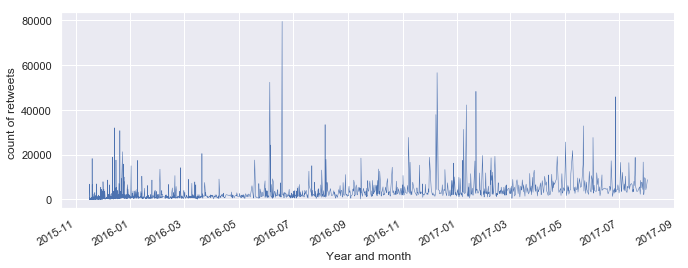

In [134]:
#Now that the timestamp column is the correct data type, let’s set it as the DataFrame’s index.
tweets_data_df=tweets_data_df.set_index('timestamp')

# Use seaborn style defaults and set the default figure size to show retwwets count over time 
sns.set(rc={'figure.figsize':(11, 4)})
tweets_data_df['retweet_count'].plot(linewidth=0.5).set(xlabel="Year and month", ylabel = "count of retweets ")

[Text(0, 0.5, 'count of favourite reactions '), Text(0.5, 0, 'Year and month')]

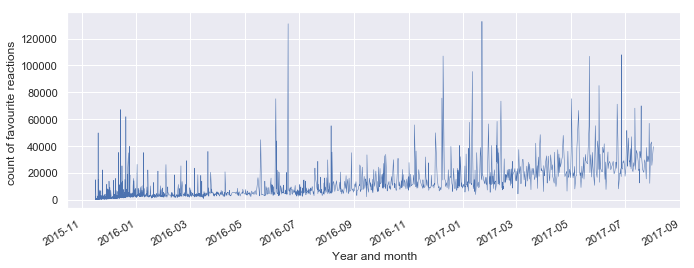

In [135]:
# visualizing number of favourite count over time 
sns.set(rc={'figure.figsize':(11, 4)})
tweets_data_df['favorite_count'].plot(linewidth=0.5).set(xlabel="Year and month", ylabel = "count of favourite reactions ")    

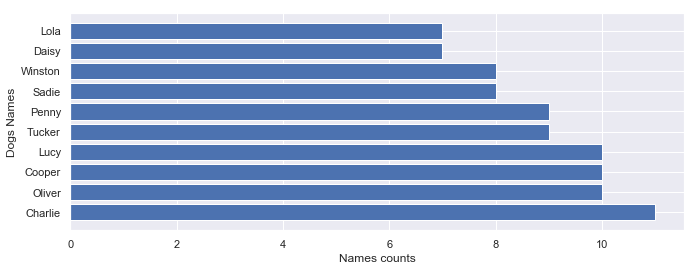

In [136]:
#  now lets plot the most 10 common dog names 
names=tweets_data_df.name.value_counts(ascending=False).sort_values(ascending=False).index.tolist()[1:11]
counts=tweets_data_df.name.value_counts(ascending=False).sort_values(ascending=False).tolist()[1:11]
plt.barh(names,
counts, align='center')
plt.ylabel("Dogs Names") 
plt.xlabel("Names counts")  
plt.show() 


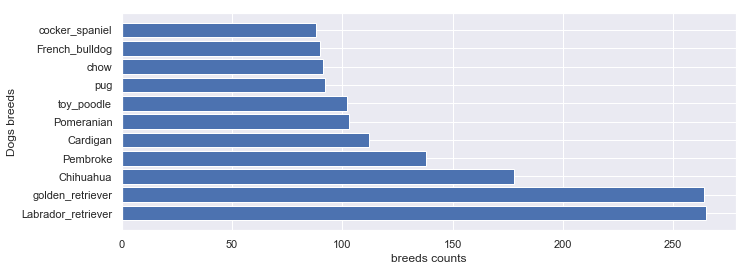

In [137]:
# the most common dog breed 
#  now lets plot the most 10 common dog names 
breeds=Image_predictions_df_cleaned.prediction_value.value_counts(ascending=False).sort_values(ascending=False).index.tolist()[0:11]
counts=Image_predictions_df_cleaned.prediction_value.value_counts(ascending=False).sort_values(ascending=False).tolist()[0:11]
plt.barh(breeds,
counts, align='center')
plt.ylabel("Dogs breeds") 
plt.xlabel("breeds counts")  
plt.show() 
